### Padronização ou Normalização

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Algoritmo SVM
from sklearn import svm

In [2]:
# Carregando o arquivo
df_original = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep = ",")

In [3]:
# Nomeando as colunas
df_original.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']

# Visualizando as primeiras linhas do DataFrame
df_original.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
# Analisando um resumo das medidas
df_original.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


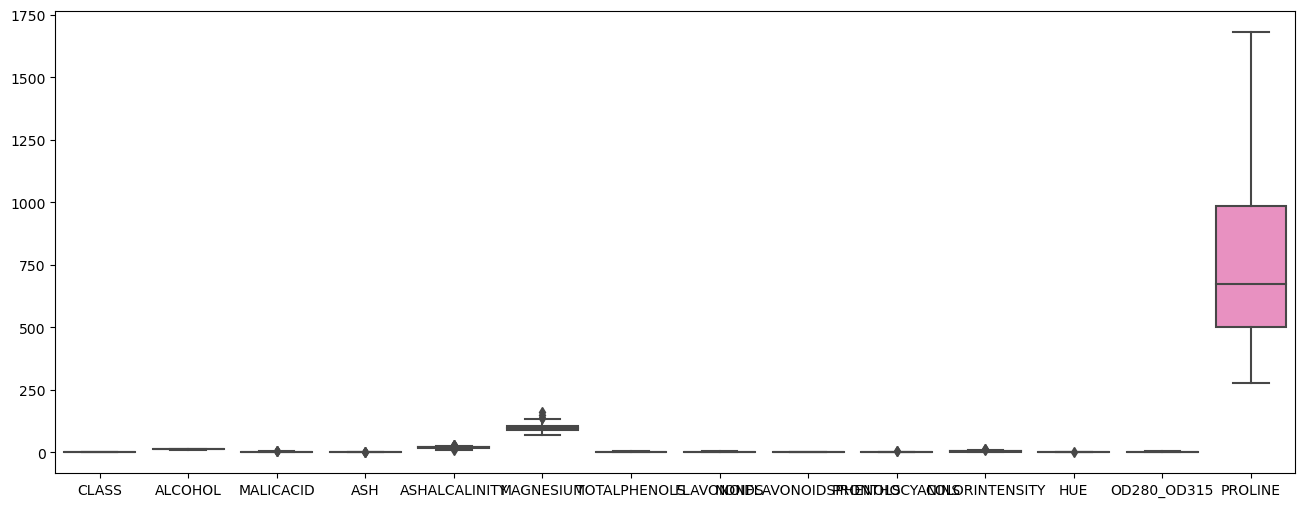

In [5]:
# Gerando um BoxPlot de todas variaveis
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_original)

In [6]:
# Criando um objeto para PADRONIZAÇÃO dos dados
obj_padronizacao = StandardScaler().fit(df_original)

In [7]:
# Aplicando a PADRONIZAÇÃO
df_padronizado = obj_padronizacao.transform(df_original)

In [8]:
# Observe que é criado um ARRAY dos dados
df_padronizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [9]:
# Transformando para DataFrame e nomeando as colunas
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']

# Visualizando os dados padronizados
df_padronizado.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [10]:
# Visualizando as medidas dos dados PADRONIZADOS
df_padronizado.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,1.327250e-15,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


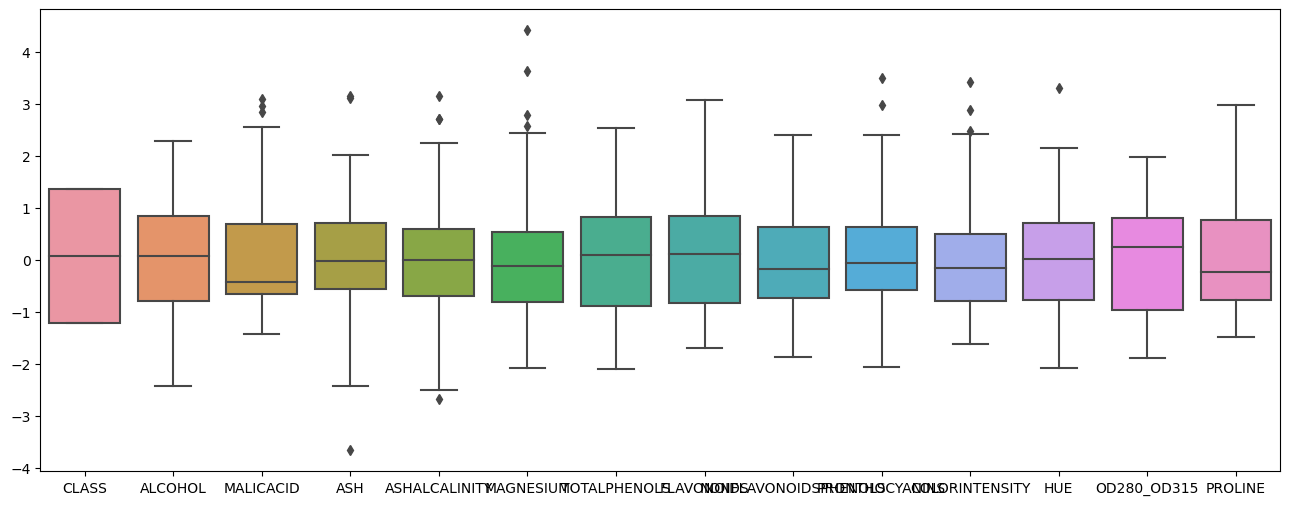

In [11]:
# Gerando os BoxPlot dos dados Padronizados
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

In [12]:
# Visualizando novamente o DataFrame Original
df_original.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(df_original)

In [14]:
# Aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(df_original)

In [15]:
# Visualizando os dados normalizados
df_normalizado

array([[0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       [0.        , 0.87894737, 0.23913043, ..., 0.30894309, 0.7985348 ,
        0.85734665],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [16]:
# Transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']


# Visualizando os dados NORMALIZADOS
df_normalizado.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


In [67]:
# Visualizando as medidas dos dados normalizados
df_normalizado.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


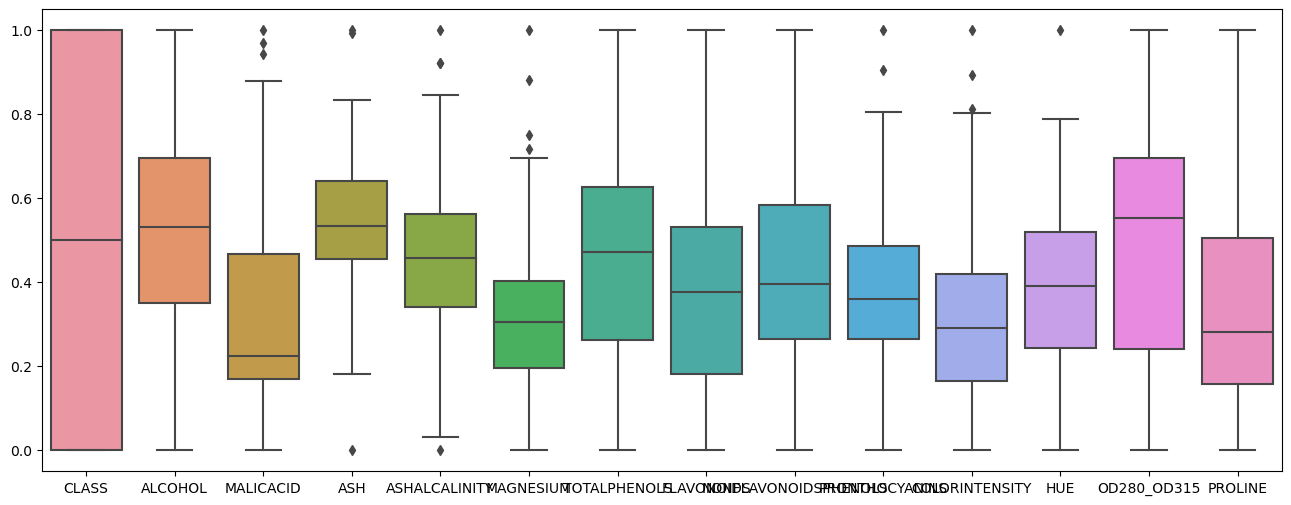

In [68]:
#from matplotlib import pyplot as plt
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

### Algoritmo KNN 

In [69]:
# Gerando um DataFrame das variáveis preditoras originais SEM a variável TARGET
VAR_PREDITORAS_ORIG = df_original.drop('CLASS', axis = 1)

In [70]:
# Gerando um DataFrame somente da variavel TARGET
VAR_TARGET = df_original['CLASS']

In [71]:
# Separando os dados em TREINO e TESTE (VARIAVEIS ORIGINAIS)
# 70% PARA TREINO E 30% PARA TESTE
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 10)

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [78]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*keepdims.*")
resultados = knn.predict(X_test)

In [79]:
score = accuracy_score(Y_test, resultados)

In [80]:
score

0.6666666666666666

In [82]:
# Gerando um DataFrame das variáveis preditoras NORMALIZADAS SEM a variável TARGET
VAR_PREDITORAS_NORM = df_normalizado.drop('CLASS', axis = 1)

In [83]:
# Gerando um DataFrame somente da variavel TARGET
# Obs: A variável TARGET NÃO É NORMALIZADA E NEM PADRONIZADA
VAR_TARGET = df_original['CLASS']

In [84]:
# Separando os dados em TREINO e TESTE (VARIAVEIS NORMALIZADAS)
# 70% PARA TREINO E 30% PARA TESTE
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 10)

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [86]:
resultados = knn.predict(X_test)

In [87]:
score = accuracy_score(Y_test, resultados)

In [88]:
score

0.9074074074074074

In [89]:
# Gerando um DataFrame das variáveis preditoras PADRONIZADAS SEM a variável TARGET
VAR_PREDITORAS_PADRON = df_padronizado.drop('CLASS', axis = 1)

In [90]:
# Gerando um DataFrame somente da variavel TARGET
# Obs: A variável TARGET NÃO É NORMALIZADA E NEM PADRONIZADA
VAR_TARGET = df_original['CLASS']

In [91]:
# Separando os dados em TREINO e TESTE (VARIAVEIS PADRONIZADAS)
# 70% PARA TREINO E 30% PARA TESTE
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 10)

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [93]:
resultados = knn.predict(X_test)

In [94]:
score = accuracy_score(Y_test, resultados)

In [95]:
score

0.9074074074074074

### Algoritmo SVM

In [96]:
VAR_PREDITORAS_ORIG = df_original.drop('CLASS', axis = 1)

In [97]:
VAR_TARGET = df_original['CLASS']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size = 0.3, random_state = 10)

In [99]:
svm = svm.SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [100]:
resultados = svm.predict(X_test)

In [101]:
score = accuracy_score(Y_test, resultados)

In [102]:
score

0.9074074074074074

In [103]:
VAR_PREDITORAS_NORM = df_normalizado.drop('CLASS', axis = 1)

In [104]:
VAR_TARGET = df_original['CLASS']

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 10)

In [106]:
svm = svm
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [107]:
resultados = svm.predict(X_test)

In [108]:
score = accuracy_score(Y_test, resultados)

In [109]:
score

0.9259259259259259

In [110]:
VAR_PREDITORAS_PADRON = df_padronizado.drop('CLASS', axis = 1)

In [111]:
VAR_TARGET = df_original['CLASS']

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 10)

In [113]:
svm = svm
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [114]:
score = accuracy_score(Y_test, resultados)

In [115]:
score = accuracy_score(Y_test, resultados)

In [116]:
score

0.9259259259259259